﻿
1. Background

According to Chicago tribune, Mayor Rahm Emanuel announced he would remove 50 red light cameras at 25 of the 174 intersections in the city's program on March 08, 2015. Furthermore, according to a Tribune-commissioned study published in December, the Tribune listed 73 camera-equipped intersections that had fewer than four injury crashes per year before the cameras were installed. The first-ever scientific study of the program concluded that the cameras offered no benefit at those intersections. The report also suggested those intersections might even be more dangerous because of an increase in rear-end crashes attributed to the cameras.


2. Problem & Target Audience

However, I would like to know whether the reduction of red light cameras has really contributed to a fall in car accidents. If his plan has had no positive effect on it, the mayor should install red light cameras again. This data science project analyzing the relation between red light cameras that had been eliminated and the number of car accidents may be helpful for the mayor to decide whether the red light camera should be installed more or not. I would like to answer to the following question through my project : Have the red light cameras that had been eliminated in 2015 had a positive effect on the reduction of car accidents in Chicago ?


3. Data Sources

Firstly, I downloaded 'red-light-camera-locations.csv' for exploring where they are located in Chicago. Secondly, 'traffic crashes-crashes.csv' was chosen for exloring which area the car accidents happend in Chicago. I got these two datasets from Chicago data potal. Since it should be shown on the map, longtitude and latitude are needed in both datasets.


4. Data Cleaning

To get needed datas only, I processed data cleaning by SQL.

In the case of 'red-light-camera-locations.csv', I selected 'longtitute' and 'latitude' only in the dataset. In the case of 'traffic crashes-crashes.csv', I made table filtered by city's name which is 'Chicago'.

﻿
5. Methodology


To see how many times traffic crashes happend in Chicago, I made two seaborn scatter plot using matplotlib and seaborn scatter plot.

﻿
﻿

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
file_name='https://data.cityofchicago.org/resource/thvf-6diy.csv'
df=pd.read_csv(file_name)

In [9]:
df.head()

,intersection,first_approach,second_approach,third_approach,go_live_date,latitude,longitude,location
0,Milwaukee-Devon,SB,WB,NaN,2009-02-28T00:00:00.000,41.997407,-87.787921,"\n, \n(41.997407, -87.787921)"
1,California-Peterson,NB,EB,NaN,2009-06-29T00:00:00.000,41.990442,-87.699401,"\n, \n(41.990442, -87.699401)"
2,Central-Addison,SB,EB,NaN,2010-11-15T00:00:00.000,41.945877,-87.766754,"\n, \n(41.945877, -87.766754)"
3,Western-63rd,NB,EB,NaN,2007-11-12T00:00:00.000,41.779214,-87.683638,"\n, \n(41.779214, -87.683638)"
4,Halsted-79th,NB,EB,NaN,2008-04-30T00:00:00.000,41.750643,-87.644043,"\n, \n(41.750643, -87.644043)"


In [11]:
df.drop(["first_approach"], axis=1, inplace=True)

In [20]:
df.describe()

,latitude,longitude
count,149.000000,149.000000
mean,41.885460,-87.699411
std,0.081213,0.050751
min,41.677815,-87.812251
25%,41.830280,-87.740163
50%,41.909626,-87.699643
75%,41.946124,-87.663063
max,42.012279,-87.575353


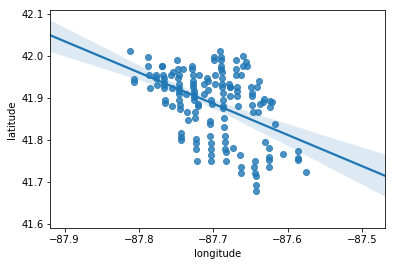

In [21]:
sns.regplot(x="longitude", y="latitude", data=df)

In [33]:
!conda install pyarrow

Solving environment: done

# All requested packages already installed.



In [30]:
import ibmcloudsql
import getpass
import pandas as pd
import urllib.parse
from IPython.display import display as dp  

In [34]:
import folium
import pandas as pd


In [41]:
file_name='https://data.cityofchicago.org/resource/85ca-t3if.csv'
df=pd.read_csv(file_name)

In [42]:
df.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,519db4334380ba2f7d4cc3f548f9a06d67e06137054d8f...,NaN,NaN,2020-10-02T00:56:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,0,6,10,41.972138,-87.728285,POINT (-87.728284738504 41.972138212358)
1,7214e742279be64b2a2121eccbd1e97703050eaab8cef3...,NaN,NaN,2020-10-02T00:54:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,0,6,10,41.977893,-87.679607,POINT (-87.679607192658 41.977892642182)
2,ba1df04aac49f9c4a185603ee240c790fc108451955a83...,NaN,NaN,2020-10-02T00:05:00.000,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,6,10,41.765150,-87.604771,POINT (-87.604770913777 41.765150330568)
3,3c6c5120b2878ad5649b23fbd654f0670da695fb3b568f...,NaN,Y,2020-10-01T23:50:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,23,5,10,41.923703,-87.636895,POINT (-87.636895047819 41.923702594733)
4,c559436c5d33575ec163b563596284b63c88ac5bf72855...,NaN,NaN,2020-10-01T22:53:00.000,35,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,1.0,0.0,2.0,0.0,22,5,10,41.753533,-87.722193,POINT (-87.722192654754 41.753532701847)


In [44]:
df.drop(["crash_record_id"], axis=1, inplace=True)

In [45]:
df.describe()

,rd_no,posted_speed_limit,lane_cnt,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude
count,0.0,1000.000000,0.0,1000.000000,1000.000000,1000.0000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0,1000.000000,1000.000000,1000.00000,997.000000,997.000000
mean,NaN,28.550000,NaN,3749.787000,1191.398000,2.0740,0.194389,0.001002,0.023046,0.111222,0.059118,1.986974,0.0,13.923000,3.007000,9.18300,41.850219,-87.679229
std,NaN,5.672714,NaN,2779.041417,694.127708,0.5223,0.520674,0.031654,0.191258,0.380906,0.292864,1.024686,0.0,5.179759,1.331437,0.38686,0.085859,0.060458
min,NaN,0.000000,NaN,1.000000,111.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,9.00000,41.652908,-87.914197
25%,NaN,30.000000,NaN,1399.000000,632.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,11.000000,2.000000,9.00000,41.773597,-87.721129
50%,NaN,30.000000,NaN,3354.500000,1112.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,15.000000,3.000000,9.00000,41.862402,-87.675667
75%,NaN,30.000000,NaN,5517.750000,1722.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,4.000000,9.00000,41.919109,-87.631826
max,NaN,45.000000,NaN,13324.000000,2535.000000,8.0000,5.000000,1.000000,3.000000,3.000000,3.000000,8.000000,0.0,23.000000,6.000000,10.00000,42.022425,-87.528321


In [47]:
df.drop(["rd_no"], axis=1, inplace=True)

In [48]:
df.describe()

,posted_speed_limit,lane_cnt,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude
count,1000.000000,0.0,1000.000000,1000.000000,1000.0000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0,1000.000000,1000.000000,1000.00000,997.000000,997.000000
mean,28.550000,NaN,3749.787000,1191.398000,2.0740,0.194389,0.001002,0.023046,0.111222,0.059118,1.986974,0.0,13.923000,3.007000,9.18300,41.850219,-87.679229
std,5.672714,NaN,2779.041417,694.127708,0.5223,0.520674,0.031654,0.191258,0.380906,0.292864,1.024686,0.0,5.179759,1.331437,0.38686,0.085859,0.060458
min,0.000000,NaN,1.000000,111.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,9.00000,41.652908,-87.914197
25%,30.000000,NaN,1399.000000,632.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,11.000000,2.000000,9.00000,41.773597,-87.721129
50%,30.000000,NaN,3354.500000,1112.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,15.000000,3.000000,9.00000,41.862402,-87.675667
75%,30.000000,NaN,5517.750000,1722.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,4.000000,9.00000,41.919109,-87.631826
max,45.000000,NaN,13324.000000,2535.000000,8.0000,5.000000,1.000000,3.000000,3.000000,3.000000,8.000000,0.0,23.000000,6.000000,10.00000,42.022425,-87.528321


In [50]:
df.drop(["posted_speed_limit"], axis=1, inplace=True)

In [54]:
df.describe()

,lane_cnt,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude
count,0.0,1000.000000,1000.000000,1000.0000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0,1000.000000,1000.000000,1000.00000,997.000000,997.000000
mean,NaN,3749.787000,1191.398000,2.0740,0.194389,0.001002,0.023046,0.111222,0.059118,1.986974,0.0,13.923000,3.007000,9.18300,41.850219,-87.679229
std,NaN,2779.041417,694.127708,0.5223,0.520674,0.031654,0.191258,0.380906,0.292864,1.024686,0.0,5.179759,1.331437,0.38686,0.085859,0.060458
min,NaN,1.000000,111.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,9.00000,41.652908,-87.914197
25%,NaN,1399.000000,632.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,11.000000,2.000000,9.00000,41.773597,-87.721129
50%,NaN,3354.500000,1112.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,15.000000,3.000000,9.00000,41.862402,-87.675667
75%,NaN,5517.750000,1722.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,4.000000,9.00000,41.919109,-87.631826
max,NaN,13324.000000,2535.000000,8.0000,5.000000,1.000000,3.000000,3.000000,3.000000,8.000000,0.0,23.000000,6.000000,10.00000,42.022425,-87.528321


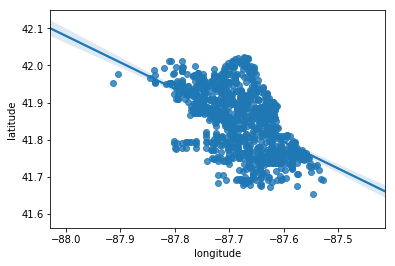

In [55]:
sns.regplot(x="longitude", y="latitude", data=df)

﻿
6. Results

According to two seaborn scatter plots, even though 50 red lights were eliminated , many traffic crashes happend in Chicago.

However red lights were emlimiated, it did not have a positive effect on the reduction of traffic accidents.


7. Discussion

Unfortunately, two seaborn scatter plots could not be on a map, so it would not make audiences understand these datas easily.

It can be said that there is no positive effect on traffic crashes, since there were still traffic crashes on the spot which the red light cameras do not exist. However, for more exact analysis, not only traffic 2019 traffic crashes data but also 2015 traffic crashes should be analyzed.


8. Conclusion

As a result, it seems that there is no significant positive effect on the reduction of traffic accidents since 2015. Regardless of red light cameras, traffic accidents still happend in 2019. If the mayor wants to find the way to reduce the number of traffic accidents in Chicago, the result of this data analysis can be considered positively, because one factor, red light cameras, cannot be the things which should be eliminated for a fall in traffic accidents.

﻿